In [1]:
import sys
sys.path.append("../")
import numpy as np
import os
import glob
import cv2
import csv
from scipy.signal import find_peaks
from utils import Tsurff, tripleplot
import pandas as pd
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
from pathlib import Path
import napari
from numpy import diff, polyfit

In [2]:
Embryo = '/Users/aimachine/Dpachys_10/Dpachys_control.tif'
EmbryoSeg = '/Users/aimachine/Dpachys_10/SegDpachys_control.tif'
savedir = '/Users/aimachine/Dpachys_10/Results/'
Path(savedir).mkdir(exist_ok = True)
Xcalibration = 0.034
Timeunit = 10
theta = 10
fitdegree = 10

In [3]:
ListMaps, Clock, time = Tsurff(Embryo,EmbryoSeg, theta,Timeunit)

100%|██████████| 370/370 [10:56<00:00,  1.77s/it]


In [9]:
with napari.gui_qt():
              viewer = napari.view_image(imread(Embryo), name='TSURFF')
              viewer.add_labels(Clock) 

In [10]:
AnteriorAngles = [0,10,20,30,40,50,60,70,80,90,100,110,120 ]
PosteriorAngles = [200,210,220,230, 240,250,260, 270,280, 330]


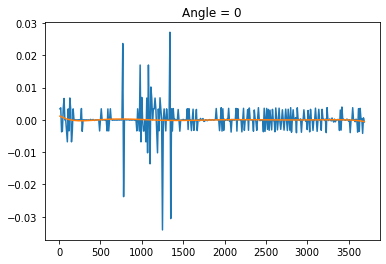

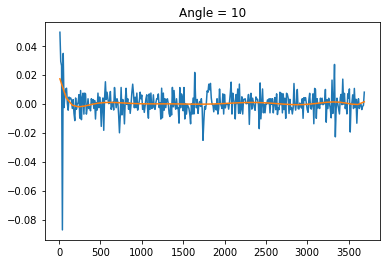

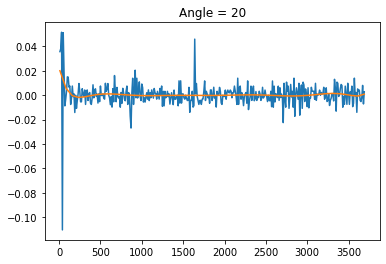

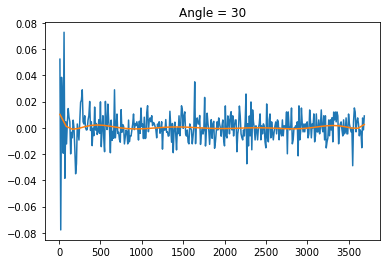

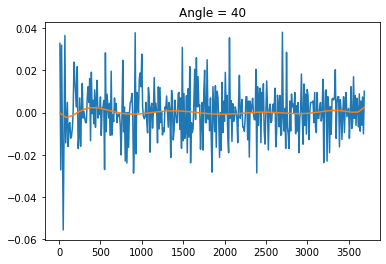

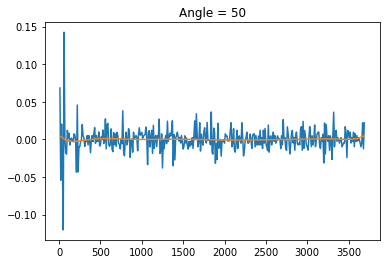

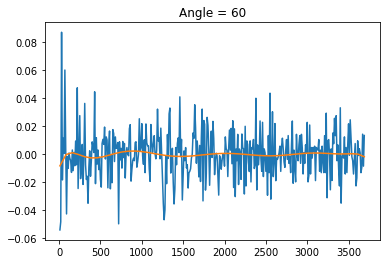

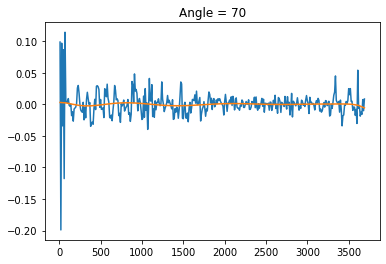

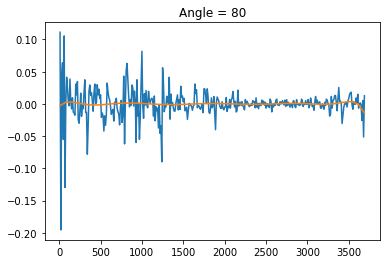

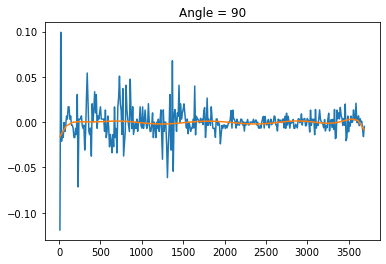

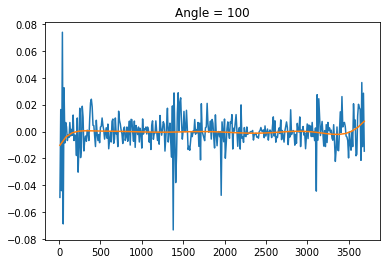

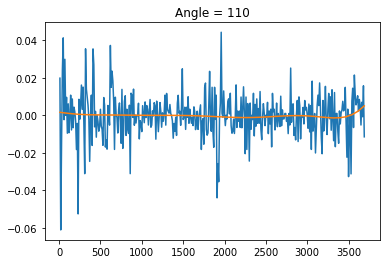

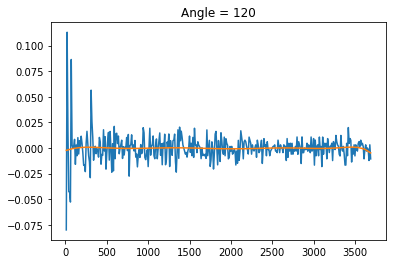

Anterior Deformation: Mean =  -0.00027090167277173105 Standard Deviation =  0.004999264842597849


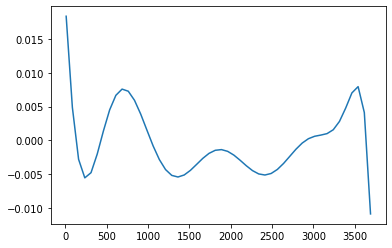

In [11]:
AnteriorAveragePoly = 0
for i in range(0, len(ListMaps)):
    
    AngleHashmap = ListMaps[i]
    for (angle,timeddistance) in AngleHashmap.items():
         
        for i in range(0, len(AnteriorAngles)):
                
                if angle == str(AnteriorAngles[i]):
                        deformation = diff(timeddistance) * Xcalibration/Timeunit
                        coefficients = polyfit(time[1:], deformation, fitdegree)
                        poly = np.poly1d(coefficients)
                        plt.plot(time[1:],deformation)
                        Anteriornew_x = np.linspace(time[1:][0], time[1:][-1])
                        Anteriornew_y = poly(Anteriornew_x)
                        AnteriorAveragePoly = AnteriorAveragePoly + Anteriornew_y
                        plt.plot(Anteriornew_x,Anteriornew_y)
                        plt.title( 'Angle = ' + str(angle))
                        plt.show()
                        
plt.plot(Anteriornew_x,AnteriorAveragePoly)    
print('Anterior Deformation:', 'Mean = ',np.mean(AnteriorAveragePoly), 'Standard Deviation = ', np.std(AnteriorAveragePoly))
                        

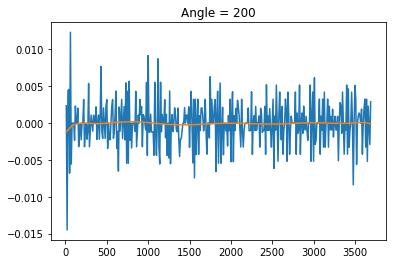

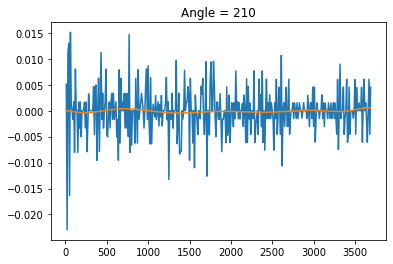

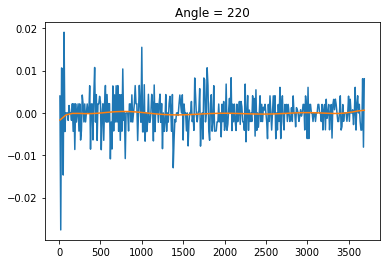

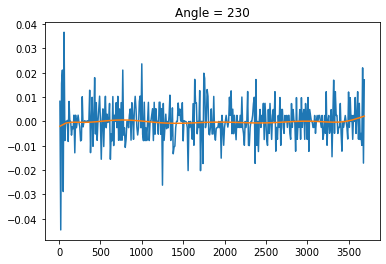

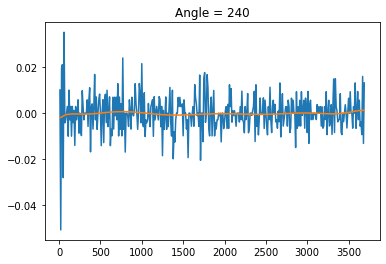

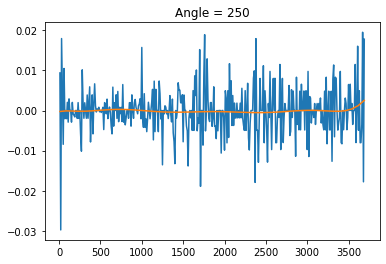

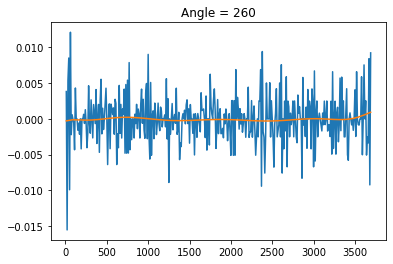

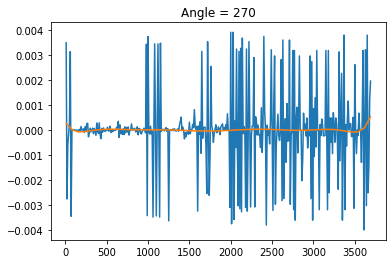

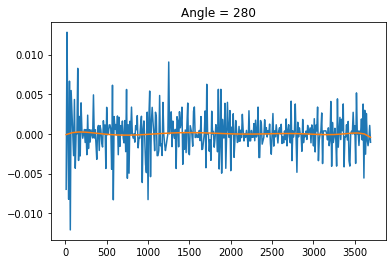

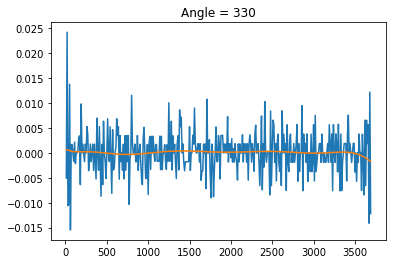

Anterior Deformation: Mean =  -0.0006690538360231749 Standard Deviation =  0.0019932887389590872


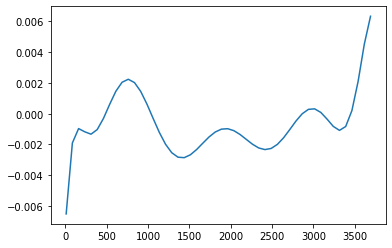

In [12]:
PosteriorAveragePoly = 0
for i in range(0, len(ListMaps)):
    
    AngleHashmap = ListMaps[i]
    for (angle,timeddistance) in AngleHashmap.items():
         
        for i in range(0, len(PosteriorAngles)):
                
                if angle == str(PosteriorAngles[i]):
                        deformation = diff(timeddistance) * Xcalibration/Timeunit
                        coefficients = polyfit(time[1:], deformation, fitdegree)
                        poly = np.poly1d(coefficients)
                        plt.plot(time[1:],deformation)
                        Posteriornew_x = np.linspace(time[1:][0], time[1:][-1])
                        Posteriornew_y = poly(Posteriornew_x)
                        PosteriorAveragePoly = PosteriorAveragePoly + Posteriornew_y
                        plt.plot(Posteriornew_x,Posteriornew_y)
                        plt.title( 'Angle = ' + str(angle))
                        plt.show()
                        
                       
plt.plot(Posteriornew_x,PosteriorAveragePoly)    
print('Anterior Deformation:', 'Mean = ',np.mean(PosteriorAveragePoly), 'Standard Deviation = ', np.std(PosteriorAveragePoly))
                        

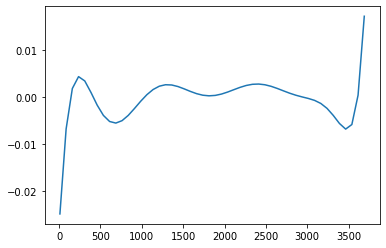

In [13]:
plt.plot(Posteriornew_x,PosteriorAveragePoly - AnteriorAveragePoly) 